In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction to Bayesian Methods

Bayesian methods refer to mathematical tools that are useful and relevant for **Bayesian inference**, which is based on the work of Thomas Bayes (1701–1761). Bayes was an English mathematician and Presbyterian minister, best known for formulating an early version of **Bayes' Theorem**.  

**Figure 1.1** (page 3) shows part of the Wikipedia article for Thomas Bayes. Bayes' ideas were further developed by others, notably:

- **Pierre-Simon Laplace** (1749–1827), a French mathematician  
- **Harold Jeffreys** (1891–1989), a British astronomer

## Bayesian vs. Classical Inference

Bayesian inference differs from **classical (frequentist) inference** by treating model parameters as random variables instead of constants. The Bayesian paradigm allows us to formally incorporate **prior information** into the analysis and can help formulate complex statistical models that might challenge classical approaches.

## Priors in Bayesian Inference

One drawback of Bayesian inference is the requirement to specify a **prior distribution**, even when no prior information is available. However, the development of suitable **uninformative priors** (also known as noninformative, objective, or reference priors) has addressed this issue.

- In many cases, these priors lead to the same point and interval estimates as classical inference.
- As the sample size increases, the Bayesian approach often converges to the same results as classical inference, regardless of the prior distribution.

## Computational Challenges

One challenge in Bayesian inference is the complexity of the necessary computations, which often involve multiple integrals or summations that are **intractable** or difficult to solve, even with advanced numerical techniques.

In such cases, the solutions can be approximated using **Monte Carlo (MC)** methods. The main idea is to use a large sample of values generated from a suitable probability distribution.

### Markov Chain Monte Carlo (MCMC) Methods

Generating these samples can be a challenge, but it is often solved using **Markov Chain Monte Carlo (MCMC)** methods. Both MC and MCMC techniques will be explored in later chapters of the course.

## Bayes' Theorem in Mathematical Form

The well-known **Bayes' Theorem** is expressed mathematically as:

$$
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
$$

Where:
- $ P(A | B) $ is the **posterior probability**, the probability of event $ A $ occurring given $ B $
- $ P(B | A) $ is the **likelihood**, the probability of observing $ B $ given $ A $
- $ P(A) $ is the **prior probability** of $ A $
- $ P(B) $ is the **marginal likelihood**, the total probability of $ B $

# Bayes' Rule

The starting point for **Bayesian inference** is **Bayes' rule**, which in its simplest form is written as:

$$
P(A | B) = \frac{P(A) P(B | A)}{P(A) P(B | A) + P(\neg A) P(B | \neg A)}
$$

where $ A $ and $ B $ are events such that $ P(B) > 0 $.

This can be proven by using the definition of conditional probability and the law of total probability.

### Proof:
1. **By the definition of conditional probability:**

$$
P(A | B) = \frac{P(AB)}{P(B)}
$$

2. **By the multiplicative law of probability:**

$$
P(AB) = P(A) P(B | A)
$$

3. **Using the law of total probability for $ P(B) $:**

$$
P(B) = P(AB) + P(\neg A B) = P(A) P(B | A) + P(\neg A) P(B | \neg A)
$$

Thus, substituting into the conditional probability expression gives us Bayes' rule.

### Interpretation:

- The posterior probability $ P(A | B) $ is equal to the prior probability $ P(A) $ multiplied by a factor, which is given by:

$$
\frac{P(B | A)}{P(B)}
$$

### Terminology:

- $ P(A) $ is called the **prior probability** of $ A $, meaning the probability of $ A $ before $ B $ is known to have occurred.
- $ P(A | B) $ is the **posterior probability** of $ A $ given $ B $, meaning the probability of $ A $ after $ B $ is known.
  
We may also say that $ P(A) $ represents our **a priori beliefs** about $ A $, while $ P(A | B) $ represents our **a posteriori beliefs** regarding $ A $.

## General Case of Bayes' Rule

More generally, we can consider any event $ B $ such that $ P(B) > 0 $ and $ k $ events $ A_1, A_2, \dots, A_k $ which form a **partition** of a superset of $ B $ (such as the entire sample space $ S $).

For any $ i = 1, \dots, k $, Bayes' rule can be written as:

$$
P(A_i | B) = \frac{P(A_i) P(B | A_i)}{P(B)}
$$

### Where:
- $ P(A_i | B) $ is the **posterior probability** of event $ A_i $ given $ B $
- $ P(A_i) $ is the **prior probability** of $ A_i $
- $ P(B | A_i) $ is the **likelihood** of $ B $ given $ A_i $
- $ P(B) $ is the **marginal likelihood** or the total probability of $ B $, which can be expressed as:

$$
P(B) = \sum_{j=1}^{k} P(A_j) P(B | A_j)
$$

In this general case, the probability $ P(B) $ is computed by summing over all possible events $ A_1, \dots, A_k $, where each $ A_j $ is weighted by its prior probability and the likelihood of $ B $ given $ A_j $.

### Recap:
- **Prior Probability**: $ P(A_i) $
- **Posterior Probability**: $ P(A_i | B) $
- **Likelihood**: $ P(B | A_i) $
- **Marginal Likelihood**: $ P(B) = \sum_{j=1}^{k} P(A_j) P(B | A_j) $

## Example: Spam Detection

Suppose we are building a spam filter that classifies emails as **Spam (S)** or **Not Spam (¬S)** based on whether certain keywords appear in the email. Let's say we observe the keyword "offer" in an email and we want to calculate the probability that the email is spam given that it contains this keyword.

### Given Data:
- Prior probability that any email is spam:  
  $ P(S) = 0.3 $ (30% of emails are spam)
  
- Prior probability that an email is not spam:  
  $ P(\neg S) = 0.7 $ (70% of emails are not spam)

- Probability that the word "offer" appears in a spam email:  
  $ P(W | S) = 0.8 $ (80% of spam emails contain the word "offer")

- Probability that the word "offer" appears in a non-spam email:  
  $ P(W | \neg S) = 0.1 $ (10% of non-spam emails contain the word "offer")

### Step 1: Compute the total probability of the word "offer" appearing in an email

We need to calculate the marginal probability \( P(W) \) that the word "offer" appears in an email, regardless of whether it is spam or not:

$$
P(W) = P(S) P(W | S) + P(\neg S) P(W | \neg S)
$$

Substituting the values:

$$
P(W) = (0.3)(0.8) + (0.7)(0.1)
$$

$$
P(W) = 0.24 + 0.07 = 0.31
$$

### Step 2: Calculate the posterior probability that the email is spam given the word "offer" appears

Now we use Bayes' Rule to compute the posterior probability $ P(S | W) $:

$$
P(S | W) = \frac{P(S) P(W | S)}{P(W)}
$$

Substituting the values:

$$
P(S | W) = \frac{(0.3)(0.8)}{0.31} = \frac{0.24}{0.31} \approx 0.774
$$

### Step 3: Calculate the probability that the email is not spam given the word "offer" appears

Similarly, we can calculate $ P(\neg S | W) $:

$$
P(\neg S | W) = \frac{P(\neg S) P(W | \neg S)}{P(W)}
$$

Substituting the values:

$$
P(\neg S | W) = \frac{(0.7)(0.1)}{0.31} = \frac{0.07}{0.31} \approx 0.226
$$

### Conclusion:

Given that the email contains the word "offer":
- The probability that the email is spam is $ P(S | W) \approx 0.774 $ (77.4%)
- The probability that the email is not spam is $ P(\neg S | W) \approx 0.226 $ (22.6%)

This shows how Bayes' rule can be applied in a spam detection system to update the likelihood that an email is spam based on the presence of certain keywords.

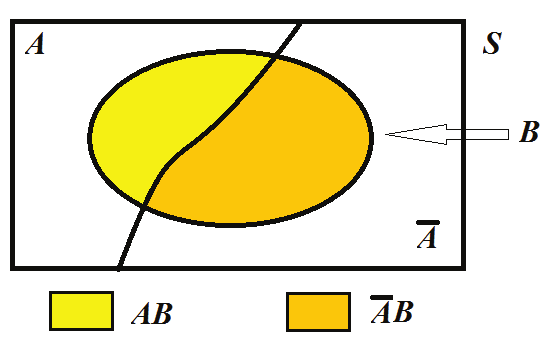
Figure 1.2 Venn diagram for Exercise 1.1

Figure 1.2 is a Venn diagram which illustrates how B may be considered
as the union of AB and AB . The required posterior probability of A
given B is simply the probability of AB divided by the probability of B.

## Generalization of Posterior Probability as a Function of Prevalence and Test Accuracy

We are interested in generalizing the formula for the posterior probability $ P(A | B) $ based on two variables:
- $ p = P(A) $: the **prevalence** or proportion of the population with the disease.
- $ q = P(B | A) $: the **accuracy** of the test, which is the probability that the test returns positive given the person has the disease.

### The Posterior Probability Formula:

The posterior probability $ P(A | B) $ is given by Bayes' rule:

$$
P(A | B) = \frac{P(A) P(B | A)}{P(A) P(B | A) + P(\neg A) P(B | \neg A)}
$$

Substituting $ p = P(A) $ and $ q = P(B | A) $, and assuming that the test has the same accuracy for both $ P(B | A) $ and $ P(B | \neg A) $, we get:

$$
P(A | B) = \frac{pq}{pq + (1 - p)(1 - q)}
$$

### Interpretation:
- $ p $ is the prevalence of the disease (proportion of the population with the disease).
- $ q $ is the accuracy of the test (the probability the test correctly identifies the disease).
- $ P(A | B) $ is the posterior probability that a person has the disease given a positive test result.

### Visualization:

We can visualize how $ P(A | B) $ changes as a function of:
1. **Prevalence $ p $**, while keeping the test accuracy $ q $ fixed.
2. **Test accuracy $ q $**, while keeping the prevalence $ p $ fixed.

#### Subplot (a): $ P(A | B) $ as a Function of $ p $ with $ q $ fixed
For fixed test accuracy $ q = 0.9 $ and $ q = 0.95 $, we plot $ P(A | B) $ as a function of $ p $, the disease prevalence.

#### Subplot (b): $ P(A | B) $ as a Function of $ q $ with $ p $ fixed
For fixed prevalence $ p = 0.01 $ and $ p = 0.05 $, we plot $ P(A | B) $ as a function of $ q $, the test accuracy.

In both subplots, the answer $ P(A | B) = \frac{1}{12} $ is represented as a point, corresponding to $ p = 0.01 $ and $ q = 0.9 $.

### Formula Summary:

For any $ p $ and $ q $:

$$
P(A | B) = \frac{pq}{pq + (1 - p)(1 - q)}
$$

This formula allows you to compute the posterior probability of a person having the disease given a positive test result based on the disease prevalence and the test's accuracy.

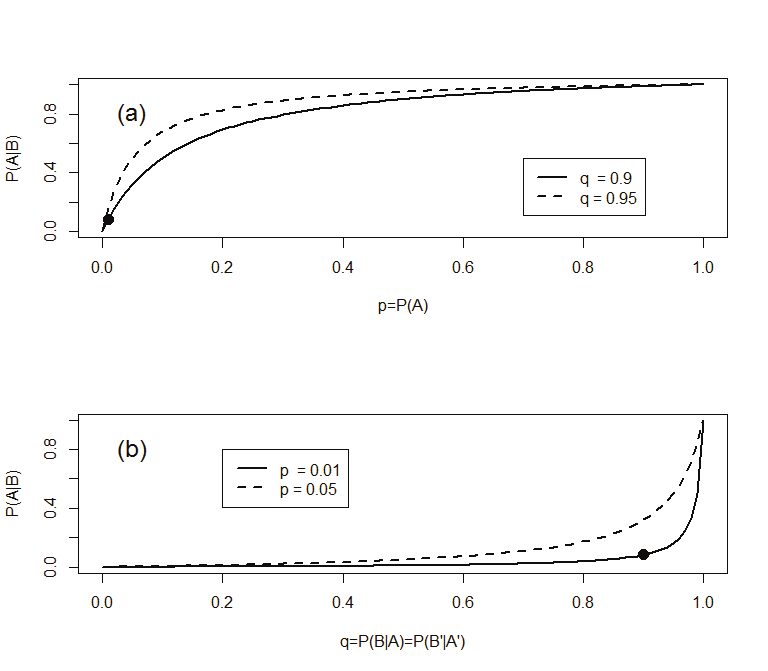


Figure 1.3 Posterior probability of disease as functions of p
and q

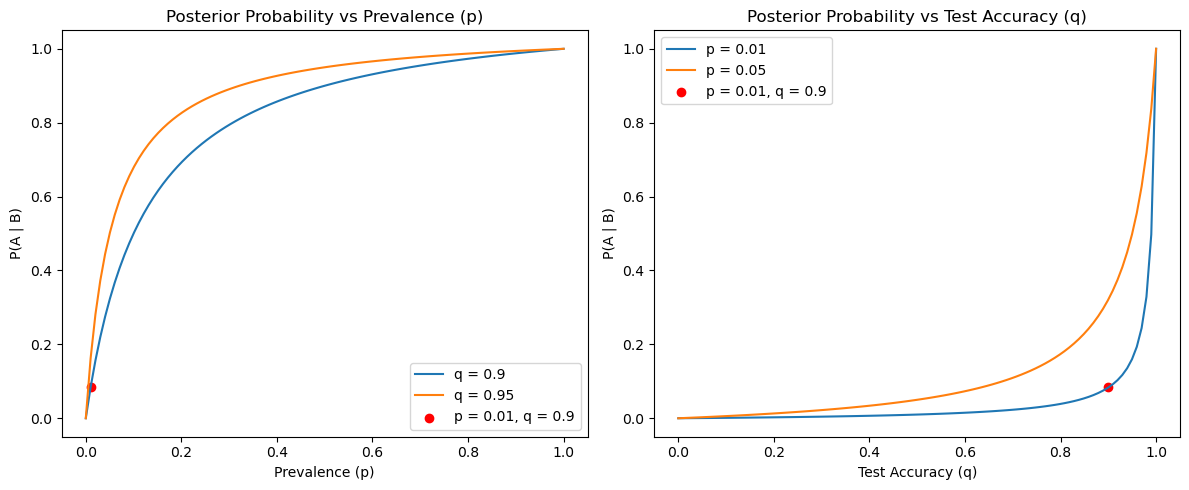

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for posterior probability P(A | B)
def posterior_probability(p, q):
    return (p * q) / (p * q + (1 - p) * (1 - q))

# Prevalence values (for subplot a)
p_values = np.linspace(0, 1, 100)
q_fixed_1 = 0.9
q_fixed_2 = 0.95

# Accuracy values (for subplot b)
q_values = np.linspace(0, 1, 100)
p_fixed_1 = 0.01
p_fixed_2 = 0.05

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Subplot (a): P(A | B) as a function of p with fixed q
ax[0].plot(p_values, posterior_probability(p_values, q_fixed_1), label='q = 0.9')
ax[0].plot(p_values, posterior_probability(p_values, q_fixed_2), label='q = 0.95')
ax[0].scatter(0.01, posterior_probability(0.01, 0.9), color='red', label='p = 0.01, q = 0.9')
ax[0].set_title('Posterior Probability vs Prevalence (p)')
ax[0].set_xlabel('Prevalence (p)')
ax[0].set_ylabel('P(A | B)')
ax[0].legend()

# Subplot (b): P(A | B) as a function of q with fixed p
ax[1].plot(q_values, posterior_probability(p_fixed_1, q_values), label='p = 0.01')
ax[1].plot(q_values, posterior_probability(p_fixed_2, q_values), label='p = 0.05')
ax[1].scatter(0.9, posterior_probability(0.01, 0.9), color='red', label='p = 0.01, q = 0.9')
ax[1].set_title('Posterior Probability vs Test Accuracy (q)')
ax[1].set_xlabel('Test Accuracy (q)')
ax[1].set_ylabel('P(A | B)')
ax[1].legend()

plt.tight_layout()
plt.show()
